# U-Net Model

# Import All Necessary Libraries and Create File Paths

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import random

# Plotting
import matplotlib.pyplot as plt

# Modelling CNN|
import tensorflow as tf
import tensorflow_addons as tfa
import glob
import math
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
import albumentations as A
from tqdm import tqdm
import math
import datetime
from keras import backend as K

In [2]:
# folder path or file path constants that will be used in this project
# Root Directory (between 'F:' or 'D:'' depends on the external drive)
ROOT = "D:"

# Folder inside D:\\wildfire-sumatera-dataset
WILDFIRE_SUMATERA_DATASET_FOLDER_PATH = os.path.join(ROOT, 'wildfire-sumatera-dataset')


# Folders and metadatas inside D:\\wildfire-sumatera-dataset
WILDFIRE_SUMATERA_GEOTIFF_FOLDER_PATH = os.path.join(WILDFIRE_SUMATERA_DATASET_FOLDER_PATH, 'wildfire-sumatera-geotiff')
WILDFIRE_SUMATERA_IMAGE_FOLDER_PATH = os.path.join(WILDFIRE_SUMATERA_DATASET_FOLDER_PATH, 'wildfire-sumatera-image')
WILDFIRE_SUMATERA_IMAGE_MASK_FOLDER_PATH = os.path.join(WILDFIRE_SUMATERA_DATASET_FOLDER_PATH, 'wildfire-sumatera-image-mask')
WILDFIRE_SUMATERA_IMAGE_MASK_TFRECORD_FOLDER_PATH = os.path.join(WILDFIRE_SUMATERA_DATASET_FOLDER_PATH, 'wildfire-sumatera-image-mask-tfrecords')

# Files (.csv) and metadatas inside D:\\wildfire-sumatera-dataset
METADATA_LANDSAT_8_FILE_PATH = os.path.join(WILDFIRE_SUMATERA_DATASET_FOLDER_PATH, 'metadata_landsat_8.csv')
METADATA_SENTINEL_2_FILE_PATH = os.path.join(WILDFIRE_SUMATERA_DATASET_FOLDER_PATH, 'metadata_sentinel_2.csv')

# Folders inside D:\\wildfire-sumatera-dataset\\wildfire-sumatera-geotiff
SENTINEL_2_GEOTIFF_FOLDER_PATH = os.path.join(WILDFIRE_SUMATERA_GEOTIFF_FOLDER_PATH, 'sentinel-2')
LANDSAT_8_GEOTIFF_FOLDER_PATH = os.path.join(WILDFIRE_SUMATERA_GEOTIFF_FOLDER_PATH, 'landsat-8')

# Folders inside D:\\wildfire-sumatera-dataset\\wildfire-sumatera-image
SENTINEL_2_IMAGE_FOLDER_PATH = os.path.join(WILDFIRE_SUMATERA_IMAGE_FOLDER_PATH, 'sentinel-2')
LANDSAT_8_IMAGE_FOLDER_PATH = os.path.join(WILDFIRE_SUMATERA_IMAGE_FOLDER_PATH, 'landsat-8')

# Folders inside D:\\wildfire-sumatera-dataset\\wildfire-sumatera-geotiff\\landsat-8
LANDSAT_8_PREFIRE_GEOTIFF_FOLDER_PATH = os.path.join(LANDSAT_8_GEOTIFF_FOLDER_PATH, 'prefire')
LANDSAT_8_POSTFIRE_GEOTIFF_FOLDER_PATH = os.path.join(LANDSAT_8_GEOTIFF_FOLDER_PATH, 'postfire')

# Folders inside D:\\wildfire-sumatera-dataset\\wildfire-sumatera-geotiff\\sentinel-2
SENTINEL_2_PREFIRE_GEOTIFF_FOLDER_PATH = os.path.join(SENTINEL_2_GEOTIFF_FOLDER_PATH, 'prefire')
SENTINEL_2_POSTFIRE_GEOTIFF_FOLDER_PATH = os.path.join(SENTINEL_2_GEOTIFF_FOLDER_PATH, 'postfire')

# Folders inside D:\\wildfire-sumatera-dataset\\wildfire-sumatera-image-mask
SENTINEL_2_IMAGE_MASK_FOLDER_PATH = os.path.join(WILDFIRE_SUMATERA_IMAGE_MASK_FOLDER_PATH, 'sentinel-2')
LANDSAT_8_IMAGE_MASK_FOLDER_PATH = os.path.join(WILDFIRE_SUMATERA_IMAGE_MASK_FOLDER_PATH, 'landsat-8')

# Folders inside
SENTINEL_2_IMAGE_MASK_TFRECORD_FOLDER_PATH = os.path.join(WILDFIRE_SUMATERA_IMAGE_MASK_TFRECORD_FOLDER_PATH, 'sentinel-2')
LANDSAT_8_IMAGE_MASK_TFRECORD_FOLDER_PATH = os.path.join(WILDFIRE_SUMATERA_IMAGE_MASK_TFRECORD_FOLDER_PATH, 'landsat-8')

dirs = [
    WILDFIRE_SUMATERA_DATASET_FOLDER_PATH,
    WILDFIRE_SUMATERA_GEOTIFF_FOLDER_PATH, 
    WILDFIRE_SUMATERA_IMAGE_FOLDER_PATH,
    WILDFIRE_SUMATERA_IMAGE_MASK_FOLDER_PATH,
    WILDFIRE_SUMATERA_IMAGE_MASK_TFRECORD_FOLDER_PATH,
    
    SENTINEL_2_GEOTIFF_FOLDER_PATH, 
    LANDSAT_8_GEOTIFF_FOLDER_PATH,
    SENTINEL_2_IMAGE_FOLDER_PATH,
    LANDSAT_8_IMAGE_FOLDER_PATH,
    
    LANDSAT_8_PREFIRE_GEOTIFF_FOLDER_PATH,
    LANDSAT_8_POSTFIRE_GEOTIFF_FOLDER_PATH,
    SENTINEL_2_PREFIRE_GEOTIFF_FOLDER_PATH,
    SENTINEL_2_POSTFIRE_GEOTIFF_FOLDER_PATH,
    
    SENTINEL_2_IMAGE_MASK_FOLDER_PATH,
    LANDSAT_8_IMAGE_MASK_FOLDER_PATH,
    
    SENTINEL_2_IMAGE_MASK_TFRECORD_FOLDER_PATH,
    LANDSAT_8_IMAGE_MASK_TFRECORD_FOLDER_PATH,
]

for dir_ in dirs:
    if not os.path.exists(dir_):
        os.mkdir(dir_)
        print(f"{dir_} has been created")
    else:
        print(f"{dir_} already exist")

D:wildfire-sumatera-dataset already exist
D:wildfire-sumatera-dataset\wildfire-sumatera-geotiff already exist
D:wildfire-sumatera-dataset\wildfire-sumatera-image already exist
D:wildfire-sumatera-dataset\wildfire-sumatera-image-mask already exist
D:wildfire-sumatera-dataset\wildfire-sumatera-image-mask-tfrecords already exist
D:wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2 already exist
D:wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8 already exist
D:wildfire-sumatera-dataset\wildfire-sumatera-image\sentinel-2 already exist
D:wildfire-sumatera-dataset\wildfire-sumatera-image\landsat-8 already exist
D:wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\prefire already exist
D:wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire already exist
D:wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\prefire already exist
D:wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire already exist
D:wildfire-sum

# Constants

In [3]:
RANDOM_STATE = 42
BATCH_SIZE = 32
SEED = RANDOM_STATE
WIDTH = 144
HEIGHT = 144
CHANNEL = 3
INPUT_SHAPE = (HEIGHT, WIDTH, CHANNEL)
AUTOTUNE = tf.data.experimental.AUTOTUNE

# Prepare Data

In [4]:
def parse_tfrecord_fn(example):
    """
    :param example: A scalar string Tensor (a single serialized example)
    :return: image and mask data in Tensor form
    """
    feature_description = {
        "image": tf.io.FixedLenFeature([], tf.string),
        "mask": tf.io.FixedLenFeature([], tf.string),
        "height": tf.io.FixedLenFeature([], tf.int64),
        "width": tf.io.FixedLenFeature([], tf.int64),
        "label": tf.io.FixedLenFeature([], tf.int64),
    }
    example = tf.io.parse_single_example(example, feature_description)
    
    example["image"] = tf.io.decode_png(example["image"])
    img_arr = tf.reshape(example["image"], INPUT_SHAPE)
    example["mask"] = tf.io.decode_png(example["mask"])
    mask = tf.reshape(example["mask"], (HEIGHT, WIDTH, 1))
    
    return example["image"], example["mask"], example["label"] 

Image shape: 1


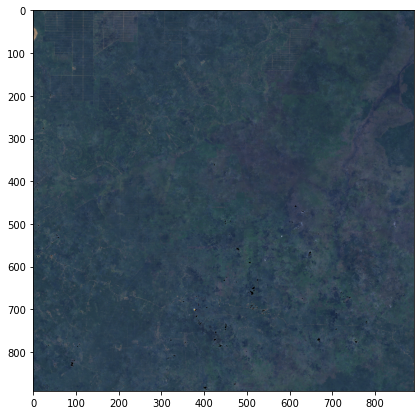

Mask shape: (891, 891, 1)


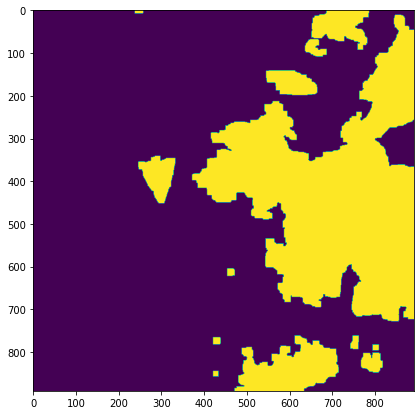

In [5]:
# return list of tfrecords using glob
files = glob.glob(os.path.join(LANDSAT_8_IMAGE_MASK_TFRECORD_FOLDER_PATH, '*.tfrec'), recursive=False)

# shuffled the filse using random sample 
random.seed(SEED)
shuffled_files = random.sample(files, len(files))

# split the shuffled file for train, validation, test
len_dataset = len(shuffled_files)

train_size = math.floor(0.8 * len_dataset)
validation_size = math.ceil(0.1 * len_dataset)
test_size = math.ceil(0.1 * len_dataset)

train_files = shuffled_files[:train_size]
validation_files = shuffled_files[train_size:train_size+validation_size]
test_files = shuffled_files[train_size+validation_size:]

# return a dataset consists of multiple files
parsed_train_dataset = tf.data.TFRecordDataset(train_files).map(parse_tfrecord_fn).filter(lambda image, mask, label: label > 0)
parsed_validation_dataset = tf.data.TFRecordDataset(validation_files).map(parse_tfrecord_fn).filter(lambda image, mask, label: label > 0)
parsed_test_dataset = tf.data.TFRecordDataset(test_files).map(parse_tfrecord_fn).filter(lambda image, mask, label: label > 0)

for image, mask, label in parsed_train_dataset.take(1):
    print(f"Image shape: {label}")
    plt.figure(figsize=(7, 7))
    plt.imshow(image.numpy()*3)
    plt.show()
    print(f"Mask shape: {mask.shape}")
    plt.figure(figsize=(7, 7))
    plt.imshow(mask.numpy())
    plt.show()

In [6]:
def set_shapes(image, mask):
    """
    :param image: image in Tensor form
    :param mask: mask in Tensor form
    :return: reshaped image and mask data in Tensor form
    """
    image.set_shape(INPUT_SHAPE)
    mask.set_shape((WIDTH, HEIGHT, 1))
    return image, mask

def normalize_image_mask(image, mask):
    """
    :param image: image in Tensor form
    :param mask: mask in Tensor form
    :return: normalized image and mask data in Tensor form
    """
    image = image/255
    mask = mask/255
    return tf.cast(image, tf.dtypes.float32), tf.cast(mask, tf.dtypes.uint8)

def resize_image_mask(image, mask):
    """
    :param image: image in Tensor form
    :param mask: mask in Tensor form
    :return: resized image and mask data in Tensor form
    """
    image = tf.image.resize(image, (WIDTH, HEIGHT), method='nearest')
    mask = tf.image.resize(mask, (WIDTH, HEIGHT), method='nearest')
    return image, mask

augmentation = A.Compose([    
    A.ShiftScaleRotate(shift_limit=[-0.2, 0.2], 
                       scale_limit=[-0.2, 0.2], 
                       rotate_limit=[-90, 90]),
    A.OneOf([
        A.ElasticTransform(p=0.7),
        A.GridDistortion(p=0.7),
        A.OpticalDistortion(p=0.7)                  
    ], p=0.8),
])


    
def augment_func(image, mask):
    """
    :param image: image in Tensor form
    :param mask: mask in Tensor form
    :return: augmented image and mask data in Tensor form
    """
    # resize image and mask
    image, mask = resize_image_mask(image, mask)
    
    # augmentation
    data = {"image": image.numpy(), 'mask': mask.numpy()}
    aug_data = augmentation(**data)
    aug_image, aug_mask = aug_data["image"], aug_data["mask"]
    
    # normalize image and mask
    aug_image, aug_mask = normalize_image_mask(aug_image, aug_mask)
    return aug_image, aug_mask

def process_data(image, mask):
    """
    :param image: image in Tensor form
    :param mask: mask in Tensor form
    :return: augmented image and mask data in Tensor form
    
    **info: this function is just a bridge for data augmentation because in order
    to do an image augmentation usiing Albumentation, requires a tf.numpy_function.
    """
    aug_image, aug_mask = tf.numpy_function(
        func=augment_func, 
        inp=[image, mask],
        Tout=[tf.float32, tf.uint8],
    )
    return aug_image, aug_mask

In [7]:
# get all images and masks
# image augmentation, resizing and normalization on the train dataset
train_dataset = parsed_train_dataset.map(lambda image, mask, _: process_data(image, mask), num_parallel_calls=tf.data.experimental.AUTOTUNE).cache()

train_dataset = train_dataset.map(set_shapes, num_parallel_calls=tf.data.experimental.AUTOTUNE) \
                .shuffle(1000) \
                .batch(BATCH_SIZE) \
                .prefetch(tf.data.experimental.AUTOTUNE)

# resizing and normalization on the validation dataset
validation_dataset = parsed_validation_dataset.map(lambda image, mask, _: resize_image_mask(image, mask), num_parallel_calls=tf.data.experimental.AUTOTUNE).cache()
validation_dataset = validation_dataset.map(normalize_image_mask, num_parallel_calls=tf.data.experimental.AUTOTUNE).cache()
validation_dataset = validation_dataset.batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)

# resizing and normalization on the test dataset
test_dataset = parsed_test_dataset.map(lambda image, mask, _: resize_image_mask(image, mask), num_parallel_calls=tf.data.experimental.AUTOTUNE).cache()
test_dataset = test_dataset.map(normalize_image_mask, num_parallel_calls=tf.data.experimental.AUTOTUNE).cache()
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)

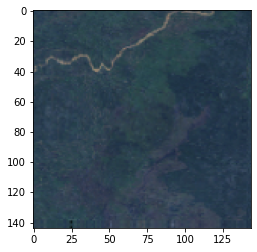

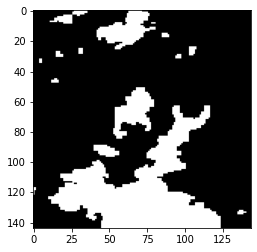

In [8]:
for d in train_dataset.take(1):
    image = d[0][0].numpy()
    mask = d[1][0].numpy()
    plt.imshow(image*3)
    plt.show()
    plt.imshow(mask, cmap='gray')
    plt.show()

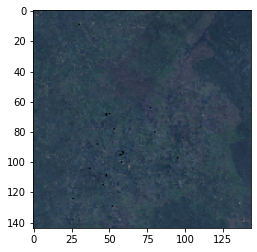

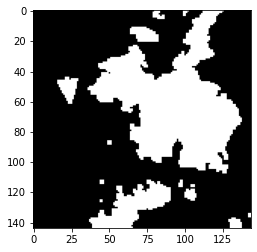

In [9]:
for d in validation_dataset.take(1):
    image = d[0][0].numpy()
    mask = d[1][0].numpy()
    plt.imshow(image*3)
    plt.show()
    plt.imshow(mask, cmap='gray')
    plt.show()

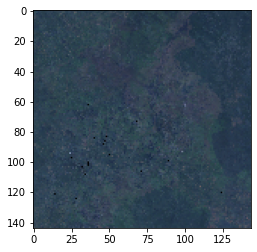

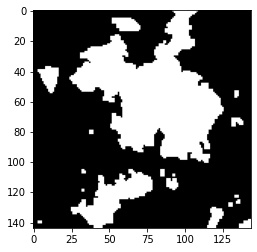

In [10]:
for d in test_dataset.take(1):
    image = d[0][0].numpy()
    mask = d[1][0].numpy()
    plt.imshow(image*3)
    plt.show()
    plt.imshow(mask, cmap='gray')
    plt.show()

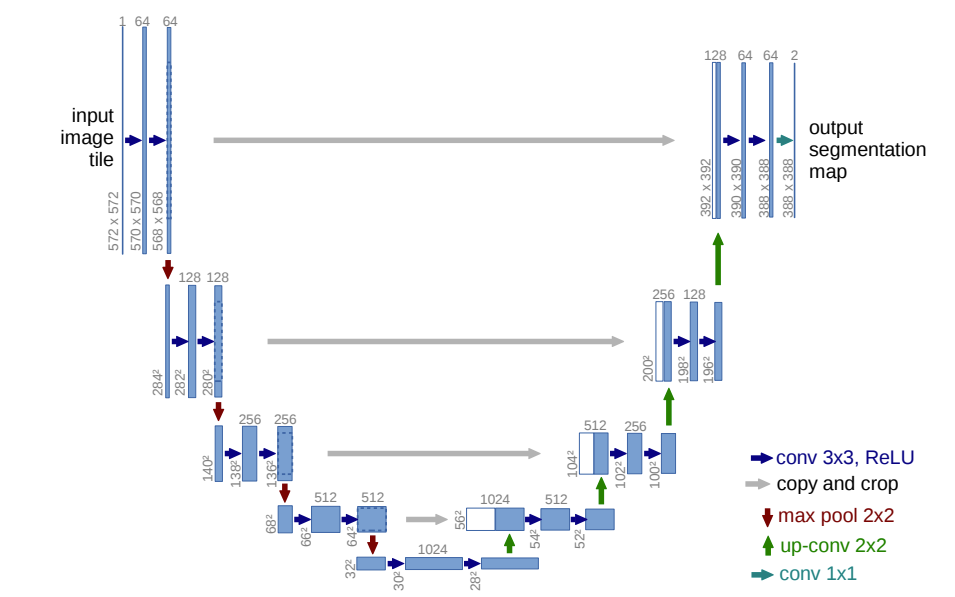

In [11]:
def double_conv_block(x, n_filters):
    """
    :param x: previous tf keras layer
    :param n_filters: amount of filters
    :return: two consecutive Conv2D layer
    """
    x = tf.keras.layers.Conv2D(filters=n_filters, kernel_size=(3, 3), activation=tf.nn.relu,
                               padding='same',kernel_initializer='he_normal')(x)
    x = tf.keras.layers.Conv2D(filters=n_filters, kernel_size=(3, 3), activation=tf.nn.relu,
                               padding='same', kernel_initializer='he_normal')(x)
    return x
    
def downsample_conv_block(x, n_filters):
    """
    :param x: previous tf keras layer
    :param n_filters: amount of filters
    :return: two consecutive Conv2D layer followed by MaxPooling2D and Dropout layer
    """
    c = double_conv_block(x, n_filters)
    p = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(c)
    p = tf.keras.layers.Dropout(0.3)(p)
    return c, p


def upsample_conv_block(x, conv_features, n_filters):
    """
    :param x: previous tf keras layer
    :param conv_features: previous Conv2D layer on the contracting path
    :param n_filters: amount of filters
    :return: Conv2DTranspose (upsampling) layer followed by concatenate layer 
             (Conv2DTranspose and Conv2D on the contracting path) and Dropout layer
    """
    x = tf.keras.layers.Conv2DTranspose(filters=n_filters,
                                        kernel_size=(3, 3),
                                        strides=(2, 2),
                                        padding='same',)(x)
    x = tf.keras.layers.concatenate([x, conv_features])
    x = tf.keras.layers.Dropout(0.3)(x)
    x = double_conv_block(x, n_filters)
    return x

    
def get_model(input_shape, starting_filter, base=2):
    """
    :param input_shape: input shape of the model (width, height, channels)
    :param starting_filter: starting filter for convolution layer to be doubled
    :param base: base of power equation (later will be multiplied to the starting filter)  
    :return: U-Net model
    """
    # input to the model     
    inputs = tf.keras.Input(shape=input_shape)
    
    # encoder: contracting path - downsample
    # downsample conv block - 1
    c1, p1 = downsample_conv_block(inputs, n_filters=int(starting_filter*math.pow(base,0)))
    # downsample conv block - 2
    c2, p2 = downsample_conv_block(p1, n_filters=int(starting_filter*math.pow(base,1)))
    # downsample conv block - 3
    c3, p3 = downsample_conv_block(p2, n_filters=int(starting_filter*math.pow(base,2)))
    # downsample conv block - 4
    c4, p4 = downsample_conv_block(p3, n_filters=int(starting_filter*math.pow(base,3)))
    
    # downsample conv block - 5 (Bottleneck)
    bottleneck = double_conv_block(p4, n_filters=int(starting_filter*math.pow(base,4)))
    
    # decoder: symmetric expanding path - upsample
    # upsample conv block - 1
    u1 = upsample_conv_block(bottleneck, c4, n_filters=int(starting_filter*math.pow(base,3)))
    # upsample conv block - 2
    u2 = upsample_conv_block(u1, c3, n_filters=int(starting_filter*math.pow(base,2)))
    # upsample conv block - 3
    u3 = upsample_conv_block(u2, c2, n_filters=int(starting_filter*math.pow(base,1)))
    # upsample conv block - 4
    u4 = upsample_conv_block(u3, c1, n_filters=int(starting_filter*math.pow(base,0)))
    
    # output
    outputs = tf.keras.layers.Conv2D(filters=1,
                                     kernel_size=(1, 1),
                                     activation='sigmoid')(u4)
    
    unet_model = tf.keras.Model(inputs, outputs, name='unet-model')
    return unet_model

# Limiting GPU memory growth

In [12]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only use the first GPU
    try:
        tf.config.set_visible_devices(gpus[0], 'GPU')
        logical_gpus = tf.config.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
    except RuntimeError as e:
        # Visible devices must be set before GPUs have been initialized
        print(e)
        
tf.debugging.set_log_device_placement(True)

1 Physical GPUs, 1 Logical GPU


# Compile and Train U-Net Model

In [13]:
# Create Model
starting_filter = 16
unet_model_original = get_model(
    input_shape=INPUT_SHAPE,
    starting_filter=starting_filter,
)
display(unet_model_original.summary())


Model: "unet-model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 144, 144, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 144, 144, 16  448         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 144, 144, 16  2320        ['conv2d[0][0]']                 
                                )                                                        

 concatenate_3 (Concatenate)    (None, 144, 144, 32  0           ['conv2d_transpose_3[0][0]',     
                                )                                 'conv2d_1[0][0]']               
                                                                                                  
 dropout_7 (Dropout)            (None, 144, 144, 32  0           ['concatenate_3[0][0]']          
                                )                                                                 
                                                                                                  
 conv2d_16 (Conv2D)             (None, 144, 144, 16  4624        ['dropout_7[0][0]']              
                                )                                                                 
                                                                                                  
 conv2d_17 (Conv2D)             (None, 144, 144, 16  2320        ['conv2d_16[0][0]']              
          

None

# Prepare metrics

In [14]:
def dice_coef(y_true, y_pred):
    """
    :param y_true: tensors contain ground truth values
    :param y_pred: tensors contain predicted values
    :return: dice coefficient value
    """
    X = tf.cast(K.flatten(y_true), tf.dtypes.float32)
    Y = tf.cast(K.flatten(y_pred), tf.dtypes.float32)
    intersection = K.sum(X * Y)
    return 2 * intersection/ (K.sum(X) + K.sum(Y))

def jaccard_coef(y_true, y_pred):
    """
    :param y_true: tensors contain ground truth values
    :param y_pred: tensors contain predicted values
    :return: jaccard coefficient value
    """
    X = tf.cast(K.flatten(y_true), tf.dtypes.float32)
    Y = tf.cast(K.flatten(y_pred), tf.dtypes.float32)
    intersection = K.sum(X * Y)
    union = K.sum(X) + K.sum(Y) - intersection
    return intersection/ union

Loss Function = Binary Cross Entropy

Metrics = Binary Accuracy (Accuracy), Dice Coefficient, Binary Intersection over Union (BinaryIoU)

In [24]:
# Compile Model
unet_model = tf.keras.models.clone_model(unet_model_original)
unet_model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy', dice_coef, tf.keras.metrics.BinaryIoU(target_class_ids=[0, 1], threshold=0.5)]
)

index = len(glob.glob('./best_unet_model*')) + 1

epochs=30
log_dir = "logs/fit/filtered_data_unet_model_{}_{}_{}baru". \
          format(starting_filter, INPUT_SHAPE[0], datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5, verbose = 2),
    tf.keras.callbacks.ModelCheckpoint(
        filepath = './best_unet_model_{}'.format(index), 
        monitor = 'val_dice_coef'.format(index), 
        save_best_only = True,
        mode = 'max', 
        verbose = 2,
    ),
    tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1),
]

history = unet_model.fit(
    train_dataset,
    epochs=epochs,
    validation_data=validation_dataset,
    callbacks=callbacks
)

Epoch 1/30
      5/Unknown - 5s 596ms/step - loss: 0.6915 - accuracy: 0.6892 - dice_coef: 0.3329 - binary_io_u_1: 0.3509

KeyboardInterrupt: 

In [17]:
%load_ext tensorboard 
%tensorboard --logdir ./logs/fit/

Reusing TensorBoard on port 6006 (pid 29772), started 10:46:27 ago. (Use '!kill 29772' to kill it.)

In [18]:
def evaluate_model(history):
    plt.figure(figsize=(10, 15))
    plt.subplot(211)
    plt.title('Accuracy vs Validation Accuracy')
    plt.plot(history.history['accuracy'], label='train accuracy')
    plt.plot(history.history['val_accuracy'], label='validation accuracy')
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(10, 15))
    plt.subplot(212)
    plt.title('Loss vs Validation Loss')
    plt.plot(history.history['loss'], label='train loss')
    plt.plot(history.history['val_loss'], label='validation loss')
    plt.legend()
    plt.show()

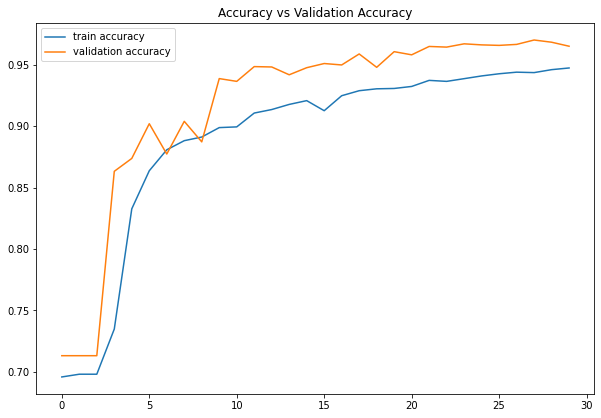

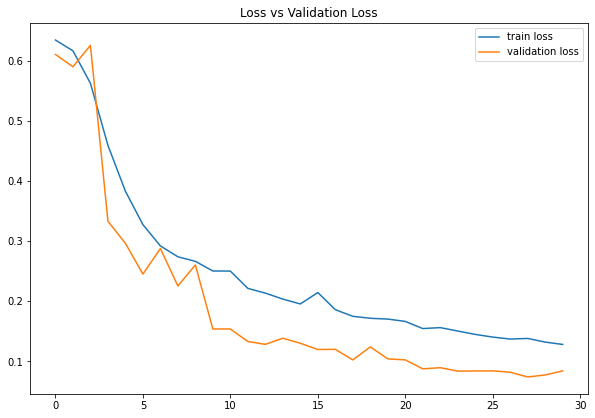

In [19]:
evaluate_model(history)

In [20]:
result = unet_model.predict(test_dataset)

3/3 [==============================] - 6s 3s/step


In [21]:
np_result = np.array(result)
# for i, res in enumerate(np_result):
np_result = np.where(np_result<0.5, 0, 1)

In [22]:
def display_image_prediction(dataset, result_mask):
    for batch in dataset.take(1):
        n_rows = len(batch[0])
        n_cols = 3
        i = 0
        fig, axs = plt.subplots(n_rows, n_cols, figsize=(30, n_rows*10), sharey=True)
        for image, true_mask in zip(batch[0], batch[1]):
            image = tf.cast(image*255, tf.uint8)
            true_mask = tf.cast(true_mask*255, tf.uint8)
            predicted_mask = result_mask[i]
            axs[i, 0].imshow(image.numpy()*3)
            axs[i, 0].set_title('Image')
            axs[i, 1].imshow(true_mask.numpy())
            axs[i, 1].set_title('True Mask')
            axs[i, 2].imshow(predicted_mask)
            axs[i, 2].set_title('Predicted Mask')
            i+=1
        plt.show()

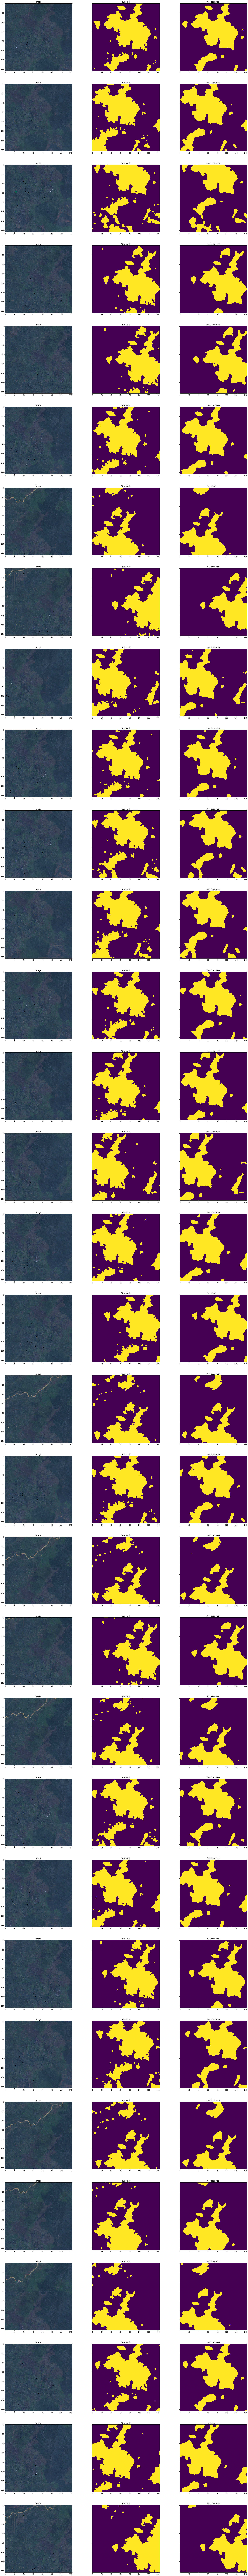

In [23]:
display_image_prediction(test_dataset, np_result)